The below code consists of three steps for exploring the dataset for investigate whether chronic kidney disease (CKD) can be accurately predicted using health factors such as markers in blood and urine samples.

 A statistical technique that might be appropriate for summarisation
and analysis of your dataset. For that technique:

As an initial step of data cleaning and data preprocessing which was performed as part of stage 1 assisgnement. The statistical technique used below is Random Forest Classification. This technique is being used as the task is classification to predict chronic kidney disease using different factors. In this technique, multiple descision trees are created with different combinations making it more accurate and robust while resisting overfitting. 

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

df = pd.read_csv('/Users/sanaali/Downloads/Stage1_Datasets_and_code/jcli1155/ckd_full.csv')


In [ ]:
# The data is multidimensional. As part of preprocessing to handle missing values and normalise data, later the 
#t-SNE method is performed for similar reason.

In [80]:
import pandas as pd
import sklearn as sk
import matplotlib as mp
from sklearn.impute import SimpleImputer

col_num = ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium','Potassium','Hemoglobin' ,'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']
for col in col_num:
    df[col].fillna(df[col].mean(), inplace=True)  
# For categorical columns, you can use the mode (most frequent value)
cat_cols = ['Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True) 
    
df.dropna(subset=['Class'], inplace=True)

In [81]:
#encoding categorical values to numerical for performing statical techniques
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col]= le.fit_transform(df[col])


Assumption:
The rows are independent and are highly correlated as per below correlation matrix. The below heatmap confirms the assumptions are to be true.

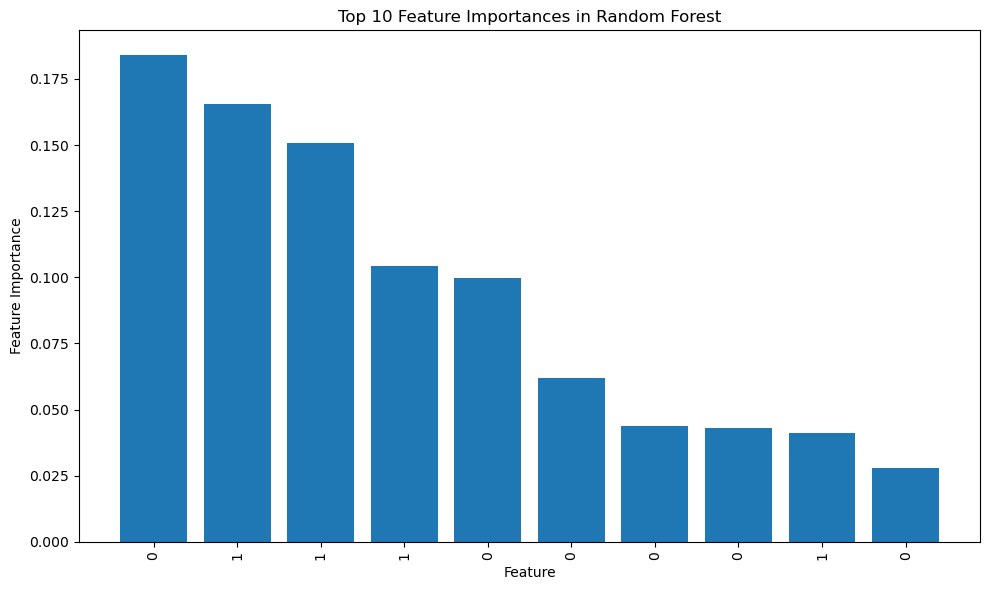

In [82]:
import matplotlib.pyplot as plt
feature_impt = RandomForestC.feature_importances_
sort_idx = np.argsort(feature_impt)[::-1]
top_n = 10 
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_impt[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), df[col][sorted_idx][:top_n], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Top {} Feature Importances in Random Forest".format(top_n))
plt.tight_layout()
plt.show()

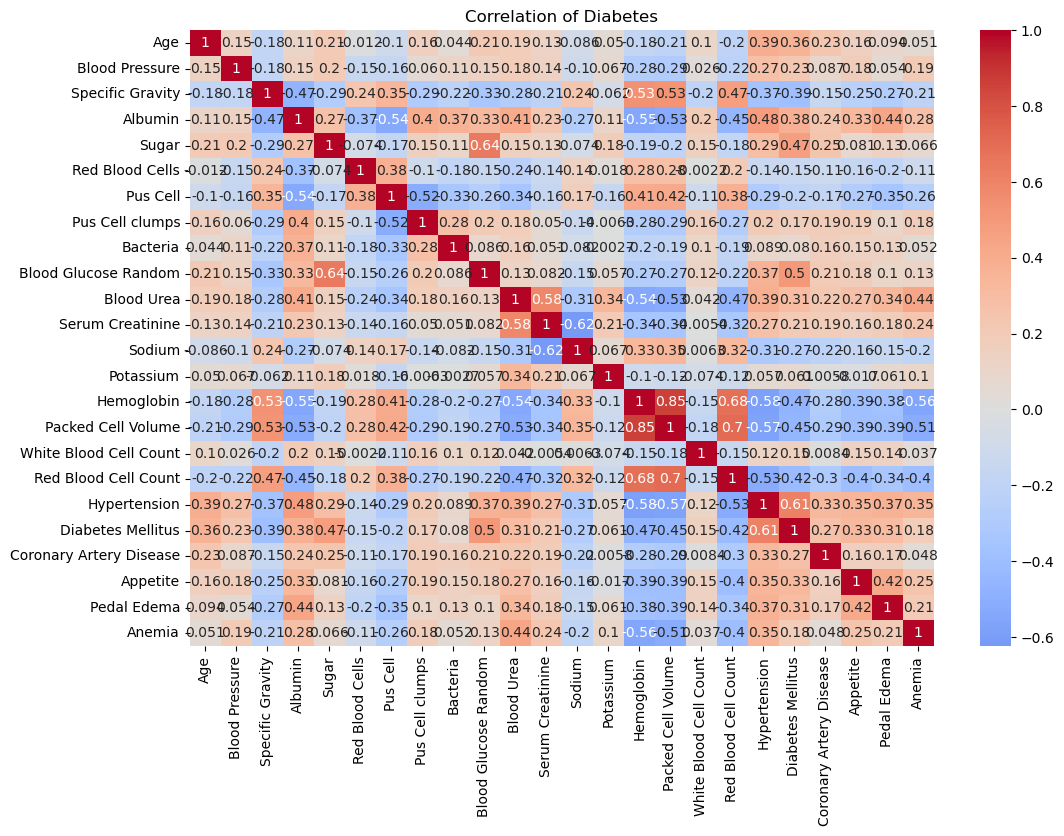

In [83]:
#df_numeric = df.select_dtypes(include=['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium','Potassium','Hemoglobin' ,'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count'])
import seaborn as sns
df_numeric = df.select_dtypes(include=['number'])
# correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Diabetes")
plt.show()




To normalise the data: Minmax scaler is used to normalise the data such that all characteristics have the same scale. This scaled data will be utilised later to run a dimension-reduction technique.


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_old = df.drop(columns=['Class']) 
y_cat = df['Class'] 
y_numeric = np.where(y_cat == 'ckd', 0, 1)
y=y_numeric
X = scaler.fit_transform(X_old)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [85]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
    
cvKFold = KFold(n_splits=10, shuffle=True, random_state=0)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=36)
tree.fit(X_train, y_train)
score = cross_val_score(tree, X, y, cv=cvKFold, scoring='accuracy')
mean_accuracy = score.mean()
print(f"Cross validation R^2 score: {mean_accuracy:.2f}")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Cross validation R^2 score: 0.98
Accuracy on training set: 0.996
Accuracy on test set: 1.000


CKD and Non-CKD distribution

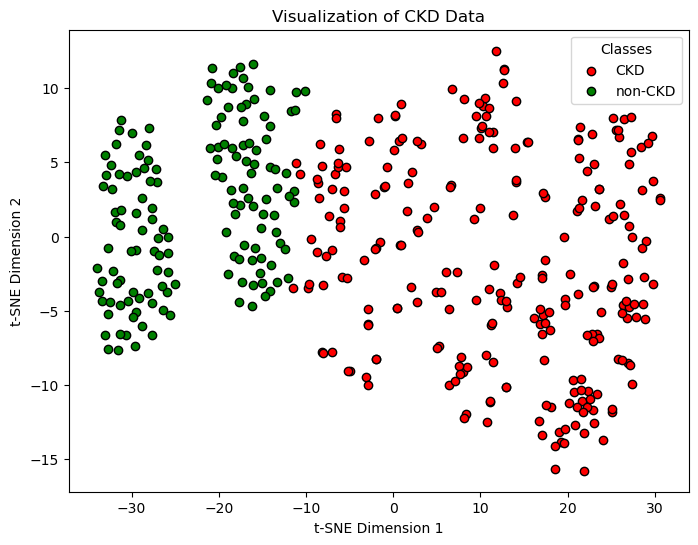

In [94]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

n_components_tsne = 2
tsne = TSNE(n_components=n_components_tsne, random_state=0)
X_tsne = tsne.fit_transform(X)

C_labels = {0: 'CKD', 1: 'non-CKD'}
labels = [C_labels[class_val] for class_val in y]

plt.figure(figsize=(8, 6))
colors = {'CKD': 'red', 'non-CKD': 'green'} 

for class_name, color in colors.items():
    class_indices = [i for i, label in enumerate(labels) if label == class_name]
    plt.scatter(X_tsne[class_indices, 0], X_tsne[class_indices, 1], color=color, edgecolor='k', label=class_name)

plt.title("Visualization of CKD Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='Classes')

plt.show()


In [54]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
    
cvKFold = KFold(n_splits=5, shuffle=True, random_state=36)
RandomForestC = RandomForestClassifier(criterion='entropy',n_estimators=500, max_leaf_nodes=5, random_state=0)
RandomForestC.fit(X_train, y_train)
y_pred = RandomForestC.predict(X_test)

score_RandomForestC = cross_val_score(RandomForestC, X, y, cv=cvKFold, scoring='r2')
mean_accuracy_RandomForestC = score_RandomForestC.mean()
print(f"Cross validation R^2 score: {mean_accuracy_RandomForestC:.2f}")
print("Accuracy on training set: {:.3f}".format(RandomForestC.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RandomForestC.score(X_test, y_test)))


Cross validation R^2 score: 1.00
Accuracy on training set: 0.989
Accuracy on test set: 0.958


In [50]:
#confusion matrix to evaluate the model 
from sklearn.metrics import  classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[72  0]
 [ 5 43]]


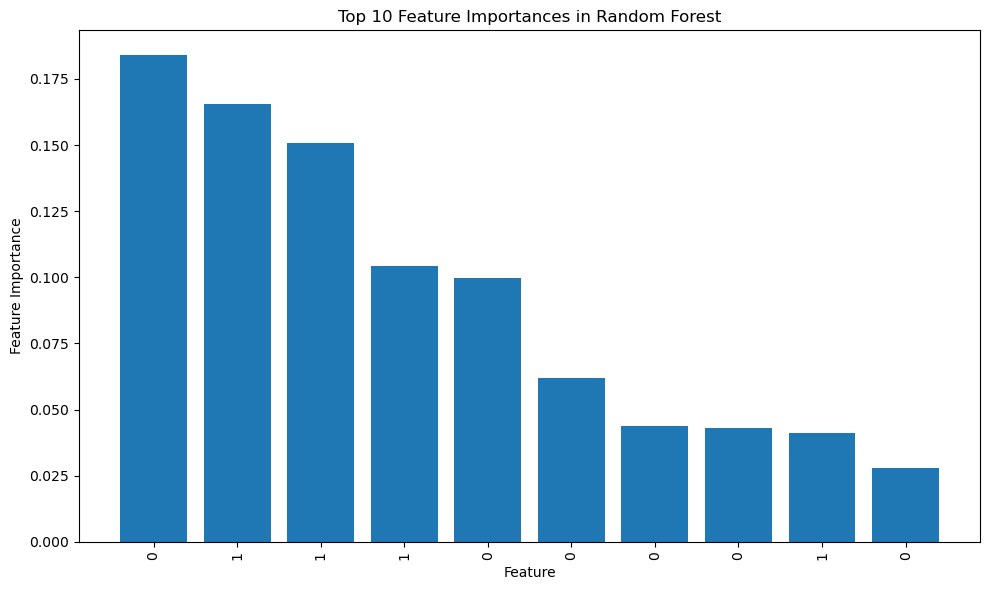

b.A statistical technique that is clearly not appropriate for
summarisation and analysis of your dataset. For that technique: Linear Regression and Ridge Regression

An initial step of data cleaning and data preprocessing which was performed as part of stage 1 assisgnement. The statistical technique used below is Linear Model Classification. This technique is not appropriate as the data has categorial values and the objective is appears to predicting CKD or not, while linear regression is primarily designed for regression tasks (predicting continuous outcomes).

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_old = df.drop(columns=['Class']) 
y_cat = df['Class'] 
y_numeric = np.where(y_cat == 'ckd', 0, 1)
y=y_numeric
X = scaler.fit_transform(X_old)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

le = LabelEncoder()
df["Class"] = le.fit_transform(df['Class'])
yl = df['Class']
X_old = df.drop(columns=['Class']) 

X_trains, X_tests, y_trains, y_tests = train_test_split(X_old, yl, test_size=0.3, random_state=0)
lr = LinearRegression().fit(X_trains, y_trains)
y_preds = lr.predict(X_tests)

# Convert predicted values to binary class labels using a threshold as the dataset is mix of continues and binary data
threshold = 0.5
y_pred_binary = np.where(y_preds >= threshold, 1, 0)

mse = mean_squared_error(y_tests, y_pred_binary)

accuracy = accuracy_score(y_tests, y_pred_binary)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Mean Squared Error: {mse}')
print("Training set R^2 score: {:.2f}".format(lr.score(X_trains, y_trains)))
print("Test set R^2 score: {:.2f}".format(lr.score(X_tests, y_tests)))
print("lr.intercept_:", lr.intercept_)


Accuracy: 0.97
Mean Squared Error: 0.025
Training set R^2 score: 0.74
Test set R^2 score: 0.70
lr.intercept_: -30.844031781052994


In [46]:
from sklearn.linear_model import Ridge
rr = Ridge().fit(X_train, y_train)
y_rr = rr.predict(X_tests)
accuracy = accuracy_score(y_tests, y_pred_binary)
print("Training set R^2 score: {:.2f}".format(rr.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(rr.score(X_test, y_test)))


Training set R^2 score: 0.67
Test set R^2 score: 0.61


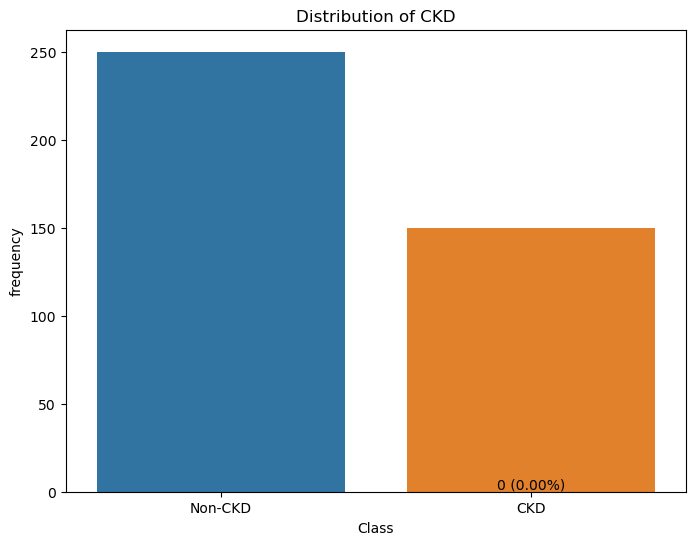

In [71]:


plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of CKD')
plt.xlabel('Class')
plt.ylabel('frequency')
plt.xticks([0, 1], ['Non-CKD', 'CKD'])
total_count = len(df)
ckd_count = len(df[df['Class'] == 'ckd'])
non_ckd_count = total_count - ckd_count
plt.annotate(f'{ckd_count} ({(ckd_count/total_count)*100:.2f}%)', xy=(1, ckd_count), ha='center', va='bottom')
plt.annotate(f'{non_ckd_count} ({(non_ckd_count/total_count)*100:.2f}%)', xy=(0, non_ckd_count), ha='center', va='bottom')

plt.show()
